# Effect of $\sigma_0^2$

## Packages

In [139]:
try:
    import os

    from google.colab import drive
    drive.mount('/content/gdrive')

    os.chdir( '/content/gdrive/My Drive/Colab Notebooks/GoA/02_binary/' )
    !ls
except Exception:
    pass

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist # For calculating QPSK decoding

import datetime, itertools, dill

from CommVAEBinary import CommVAEBinary

## Train Settings for binary block

In [141]:
noOfEpochs = 5000
blkSize = 5
mbSize = 1000
chDim = 1

# Input
inVecDim   = blkSize  #
encDim = 2*chDim
print( "In Vector Dim:", inVecDim )
print( "z dim:", encDim )

# Train Data
xTrain = np.random.randint(2,size=(10000,blkSize))
xVal = np.random.randint(2,size=(10000,blkSize))


In Vector Dim: 5
z dim: 2


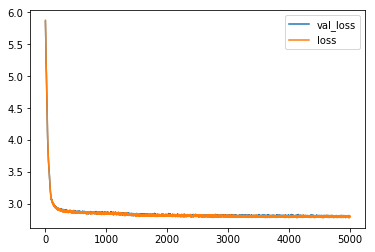

In [142]:
try:
  K.clear_session()
  del model1
except:
  pass

model = CommVAEBinary( inVecDim, encDim, h_dim=[32,16], n0=0.1*inVecDim, obj_fn='RBF', sigma0_2 = 7.50) # in_dim=None, latent_dim=None, h_dim=None, obj_fn = 'RBF', n0=1.0
h = model.fit( xTrain, epochs=noOfEpochs, batch_size=mbSize, validation_data=(xVal,None), verbose=0 )
for (l,d) in h.items():
  plt.plot(d, label=l )
plt.legend()

Text(0, 0.5, 'Q')

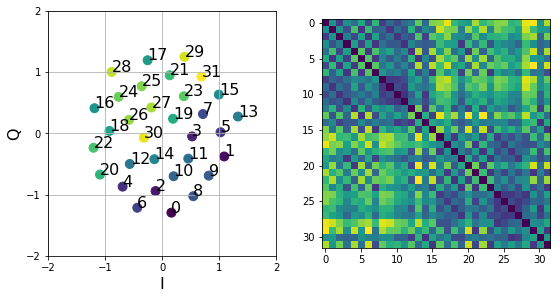

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(2*4.5, 4.5))

m_points = model.get_constellation()
m_pow = np.mean(np.sum(m_points*m_points,axis=1))
m_points = np.sqrt(1.0/m_pow) * m_points
ax[1].imshow(cdist(m_points,m_points))

chDim = model.latent_dim//2
for i in range(chDim):
  ax[0].scatter(m_points[:,i], m_points[:,i+chDim], c=np.arange(2**model.in_dim), s=80)
  for j in range(2**model.in_dim):
    ax[0].annotate( j, (m_points[j,i],m_points[j,i+chDim]), size=16)
#     # trick to avoid overlap during cheating
#     ax1.annotate( "{:2d}".format(j) if j < 16 else "    {:2d}".format(j), (m2_points[j,i],m2_points[j,i+chDim]), size=16)
ax[0].grid()
ax[0].set_xticks(np.arange(-2.0,2.1,1.0))
ax[0].set_yticks(np.arange(-2.0,2.1,1.0))
ax[0].set_xlabel("I", fontdict={'fontsize':16})
ax[0].set_ylabel("Q", fontdict={'fontsize':16})

In [144]:
fname = "./models_32x01_sigma0_2/{}_s{:04d}_02".format(model.obj_fn, int(100*model.sigma0_2))
print(fname)
model.save_model(fname)

./models_32x01_sigma0_2/RBF_s0750_02
